In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
csv_path = "/home/avees/secure-inference/output/layer_time.csv"
df = pd.read_csv(csv_path)
df = df.drop(columns=['layer_index'])
df = df.apply(pd.to_numeric, errors='coerce')

# 레이어 수
num_layers = df.shape[1]

# 서브플롯 생성 (세로 스크롤식)
fig, axes = plt.subplots(num_layers, 1, figsize=(10, 2*num_layers), sharex=False)

for i, col in enumerate(df.columns):
    axes[i].plot(df[col].values, marker='o', linestyle='-', alpha=0.7)
    axes[i].set_title(f"Layer {col} Execution Time")
    axes[i].set_ylabel("ms")
    axes[i].grid(True, linestyle="--", alpha=0.6)

axes[-1].set_xlabel("Trial Index")

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] File b'/home/avees/secure-inference/output/layer_time.csv' does not exist: b'/home/avees/secure-inference/output/layer_time.csv'

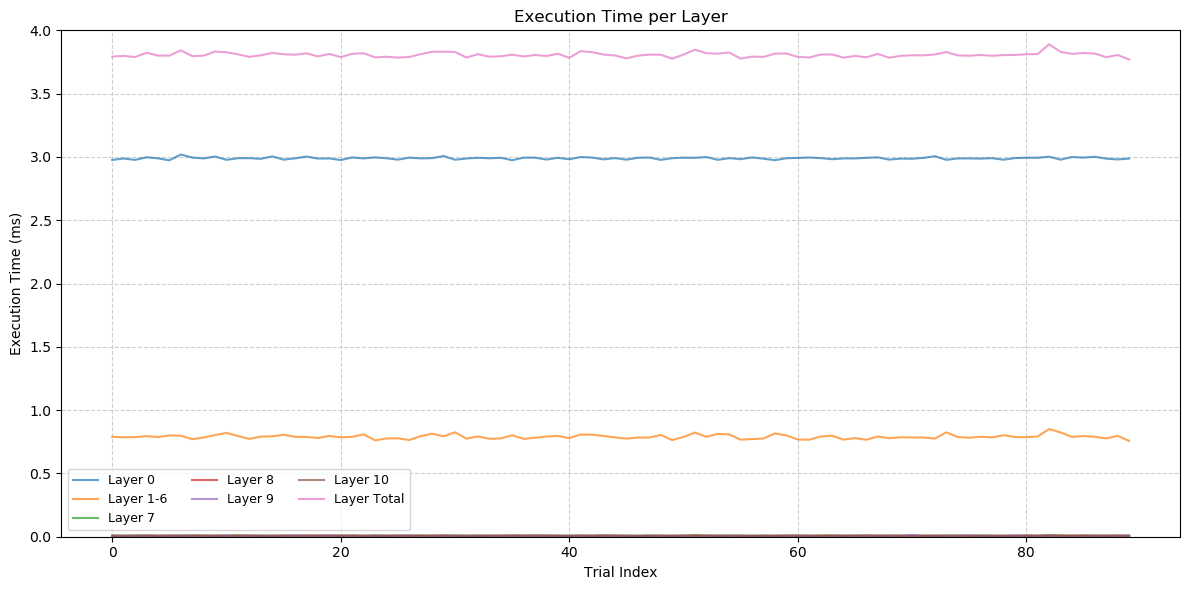

In [86]:
csv_path = "/home/avees/secure-inference/output/layer_time.csv"
df = pd.read_csv(csv_path)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.iloc[10:].reset_index(drop=True)
df = df.dropna(how='all')

# 한 그래프에 여러 레이어 그리기
plt.figure(figsize=(12, 6))

for col in df.columns:
    plt.plot(df[col].values, marker='o', markersize=0, linestyle='-', alpha=0.7, label=f"Layer {col}")
plt.title("Execution Time per Layer")
plt.xlabel("Trial Index")
plt.ylabel("Execution Time (ms)")
plt.ylim(0, 4)
plt.legend(ncol=3, fontsize=9)  # 범례를 여러 열로 배치
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
import csv
import matplotlib.pyplot as plt
filename = "/home/avees/tee/output/predict1000.csv"
labels = []
means = []
with open(filename, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if not row:
            continue
        label = row[0].strip()
        values = [float(x.strip()) for x in row[1:] if x.strip() != ""]
        avg = sum(values[10:])/(len(values)-10)
        labels.append(label)
        means.append(avg)
plt.figure(figsize=(20, 5))
plt.plot(labels, means, marker='o', linestyle='-')
plt.xlabel("Label")
plt.ylabel("Mean (after skipping first 10 values)")
plt.title("Experiment Results")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'int'

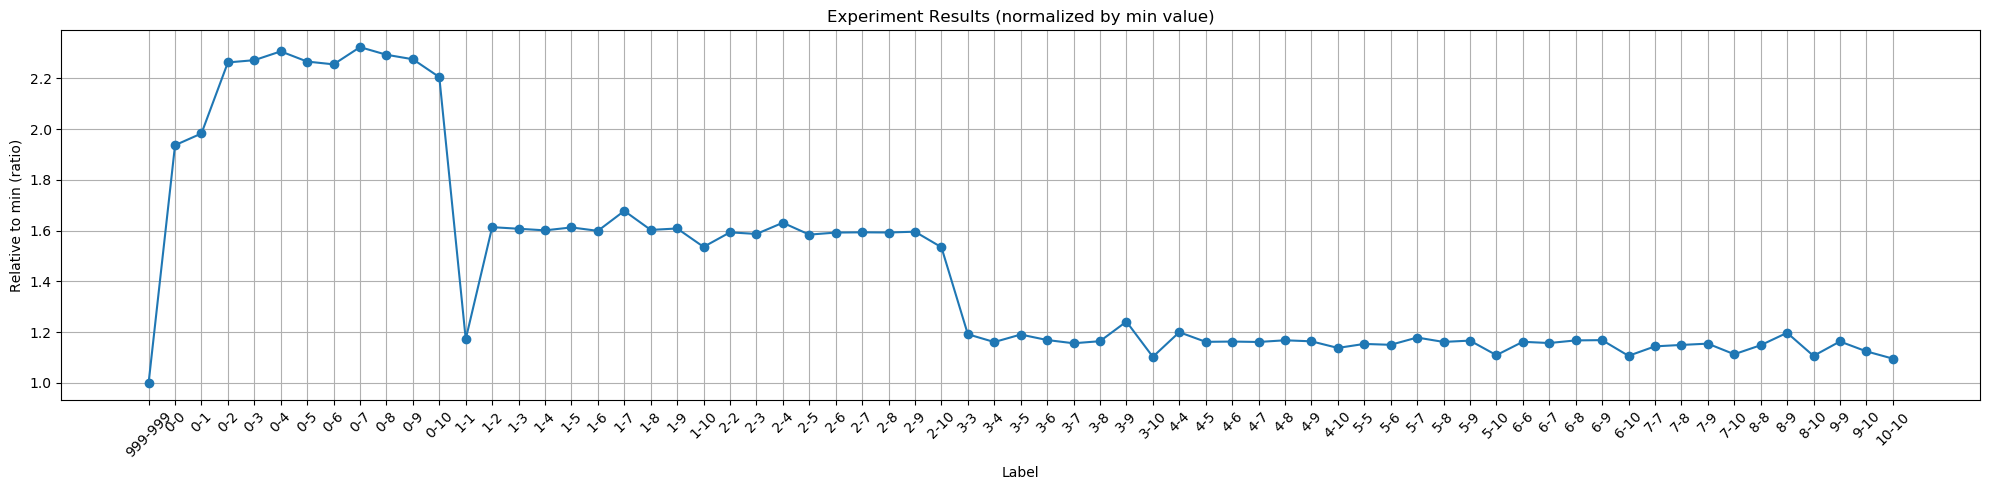

In [24]:
import csv
import matplotlib.pyplot as plt

filename = "/home/avees/tee/output/predict.csv"
labels = []
means = []

with open(filename, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if not row:
            continue
        label = row[0].strip()
        values = [float(x.strip()) for x in row[1:] if x.strip() != ""]
        avg = sum(values)/len(values)
        labels.append(label)
        means.append(avg)

# 최솟값으로 정규화
min_val = min(means)
ratios = [m / min_val for m in means]

plt.figure(figsize=(20, 5))
plt.plot(labels, ratios, marker='o', linestyle='-')
plt.xlabel("Label")
plt.ylabel("Relative to min (ratio)")
plt.title("Experiment Results (normalized by min value)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


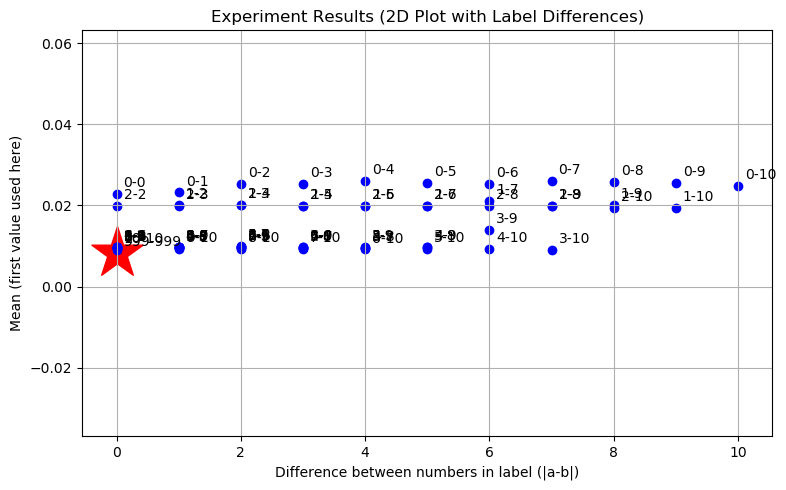

In [17]:
import csv
import matplotlib.pyplot as plt

filename = "/home/avees/tee/output/predict.csv"
x_vals, y_vals, labels = [], [], []

with open(filename, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if not row:  # 빈 줄 건너뛰기
            continue
        label = row[0].strip()
        a_str, b_str = label.split("-")
        a, b = int(a_str), int(b_str)
        x = abs(a - b)
        values = list(map(float, row[1:]))
        avg = values[0]
        x_vals.append(x)
        y_vals.append(avg)
        labels.append(label)

plt.figure(figsize=(8, 5))

# 전체 점 (파란색 원)
for x, y, lbl in zip(x_vals, y_vals, labels):
    if lbl == "999-999":
        plt.scatter(x, y, c="red", marker="*", s=1500, label="999-999")  # 빨간 별
    else:
        plt.scatter(x, y, c="blue", marker="o")

# 각 점 옆에 라벨 표시
for i, txt in enumerate(labels):
    plt.annotate(txt, (x_vals[i], y_vals[i]), textcoords="offset points", xytext=(5,5))

plt.xlabel("Difference between numbers in label (|a-b|)")
plt.ylabel("Mean (first value used here)")
plt.title("Experiment Results (2D Plot with Label Differences)")
plt.grid(True)
plt.tight_layout()
plt.show()
